In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import urllib.request
import pandas as pd
import requests
import os
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
# pd.options.display.max_columns

In [ ]:
df_2['num_sales'].value_counts()

In [ ]:
# df.codes.dropna().apply(pd.Series)
df_2.last_sale.dropna().apply(pd.Series)

In [ ]:
df_3 = pd.read_csv('nft_sale_count.csv')

In [ ]:
df_3.info()

In [2]:
parse_dates = ['asset_contract.created_date', 'collection.created_date']
sale_df = pd.read_csv('nftsale.csv', low_memory=False, parse_dates=parse_dates)

In [ ]:
sale_df.shape

In [3]:
sale_df['asset_contract.name'].value_counts(normalize = True)

OpenSea Collection                          0.545260
Dodgers MLB Crypto                          0.167762
Rarible 1155                                0.069152
Hero                                        0.041837
parallel                                    0.011756
                                              ...   
Xenum                                       0.000069
Floki Inu - Silver                          0.000069
GalacticMonkes                              0.000069
GROWTH by Calvin Harris x Emil Nava         0.000069
Ositos Collections Open Edition by Ozuna    0.000069
Name: asset_contract.name, Length: 433, dtype: float64

### Feature engineering for the target

In [3]:
sale_df['num_sales'].isna().value_counts()

False    14461
Name: num_sales, dtype: int64

In [4]:
sale_df['last_sale.event_type'].isna().value_counts()

True     10277
False     4184
Name: last_sale.event_type, dtype: int64

In [5]:
sale_df['sell_orders'].isna().value_counts()

True     8216
False    6245
Name: sell_orders, dtype: int64

In [4]:
# join the 3 columns into one for the target label
len(sale_df[(sale_df['num_sales'] > 0) |
            (sale_df['sell_orders'].notna()) | 
            (sale_df['last_sale.event_type'].notna())])/len(sale_df)

0.66800359587857

In [6]:
sale_df['target'] = np.where((sale_df['num_sales'] > 0) |
            (sale_df['sell_orders'].notna()) | 
            (sale_df['last_sale.event_type'].notna()), 1, 0)

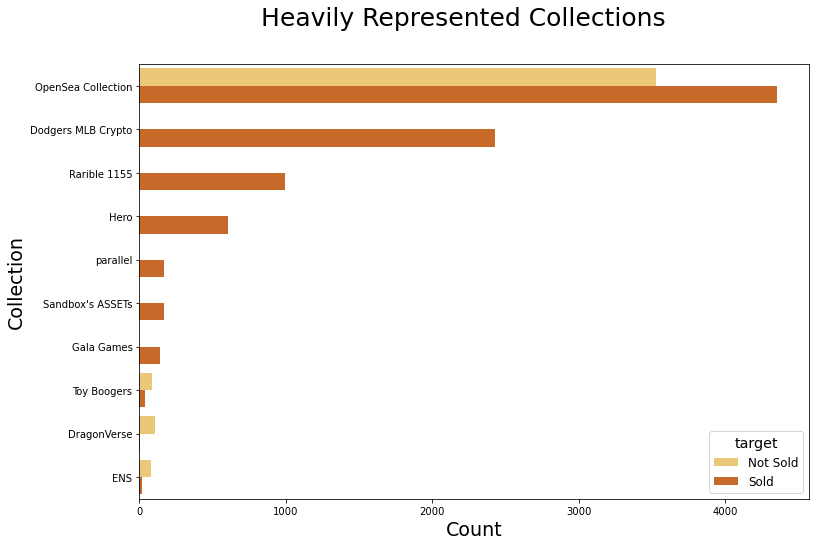

In [14]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(data=sale_df,
              y='asset_contract.name',
              hue='target',
              order=sale_df['asset_contract.name'].value_counts().iloc[:10].index, 
              palette = 'YlOrBr',
              ax=ax)
fig.suptitle('Heavily Represented Collections', fontsize=25)
ax.set_xlabel('Count', fontsize=19)
ax.set_ylabel('Collection', fontsize=19)
plt.legend(title='target', 
           title_fontsize = 'x-large',
           labels=['Not Sold', 'Sold'],
           fontsize="large", 
           loc='best')

In [7]:
sale_df['target'].value_counts(normalize=True)

1    0.668004
0    0.331996
Name: target, dtype: float64

#### Drop unwanted columns 

In [ ]:
with pd.option_context('display.max_rows', 140):
    display(sale_df.columns)

In [8]:
nft_sale_df = sale_df[['image_thumbnail_url', 'target']]

### Create a dataframe for target and images

In [ ]:
nft_sale_df.to_csv('nft_urls.csv')

In [10]:
nft_saled_df = nft_sale_df.dropna()

In [11]:
nft_saled_df['target'].value_counts()

1    9024
0    4759
Name: target, dtype: int64

In [19]:
nft_saled_df.head(12)

,image_thumbnail_url,target
0,https://lh3.googleusercontent.com/9GgkzN-7si-y...,1
1,https://lh3.googleusercontent.com/G_6AOl7ChtSg...,1
2,https://lh3.googleusercontent.com/AzJqhKOP2m_n...,1
3,https://lh3.googleusercontent.com/TgZhu3HfmExk...,1
4,https://lh3.googleusercontent.com/FIjcBiS0BxSQ...,1
5,https://lh3.googleusercontent.com/a74TaUEZdwt-...,1
6,https://lh3.googleusercontent.com/eMRPG2EmRQzF...,1
7,https://lh3.googleusercontent.com/-sj1PAPGnEUm...,1
8,https://lh3.googleusercontent.com/ZPV8963OUBP8...,1
9,https://lh3.googleusercontent.com/BIkJLvb8rS7a...,1


### Download all  images from the url

In [ ]:
# to download the images from the url columns, use the url library and this looks for the images
# in the url columns and downloads the images
# remember to uses the user-agent to create a buffer between request to prevent the server giving
# error messages because of continous workload on the server.
# the agent legimatices the request as non bot.

In [11]:
nft_saled_df.image_thumbnail_url[85]

'https://storage.opensea.io/0x06012c8cf97bead5deae237070f9587f8e7a266d-thumbnail/853115-1549880758.png'

In [15]:
test = nft_saled_df.reset_index()

check if the downloaded images corresponds with the urls

In [16]:
test['image_thumbnail_url'][1779]

'https://lh3.googleusercontent.com/2lVt4OQV7eW7qY7vA4820hj7n8x7fVESGS3bLBdg9QOhL0Ezizz1P0upvk7ffT3rjafq2qDO4V0i6T7CFeTR9BbZV1coow6jFt_p2Q=s128'

In [17]:
test.loc[test['index'] == 1779]['target']

1779    1
Name: target, dtype: int64

In [25]:
test.loc[test['target'] == 0].head(12)

,index,image_thumbnail_url,target,id
6611,7246,https://lh3.googleusercontent.com/CIGbsOUd85WI...,0,7246
6613,7248,https://lh3.googleusercontent.com/S1us1s9v21z2...,0,7248
6615,7250,https://lh3.googleusercontent.com/nOYDk5UZEP2t...,0,7250
6616,7251,https://lh3.googleusercontent.com/py0l6-upD3SE...,0,7251
6617,7252,https://lh3.googleusercontent.com/RlyBy-BVf9Om...,0,7252
6618,7253,https://lh3.googleusercontent.com/ul-c-SdXmyPo...,0,7253
6620,7255,https://lh3.googleusercontent.com/rZTrovmsshIN...,0,7255
6621,7256,https://lh3.googleusercontent.com/7c6_wiE2nZcX...,0,7256
6622,7257,https://lh3.googleusercontent.com/OBs8TPwcxjLb...,0,7257
6623,7258,https://lh3.googleusercontent.com/blTlszouImh4...,0,7258


In [18]:
test['id'] = test['index']

In [29]:
test.head(2)

,index,image_thumbnail_url,target,id
0,0,https://lh3.googleusercontent.com/9GgkzN-7si-y...,1,0
1,1,https://lh3.googleusercontent.com/G_6AOl7ChtSg...,1,1


In [20]:
test.shape

(13783, 4)

In [ ]:
# rel_path = 'whatever your current path is'
# base_path = 'Data/train'
# for row in dataframe.index:
#   id_num = test.at(row, 'id')
#   target_val = test.at(row, 'target')
#   new_path = f"{base_path}/{target_val}/image{id_num}.jpg"
#   os.rename(f"{rel_path}/my_image_{id_num}.jpg", new_path)

Download test url images into the local drive and sort each images based on sold and unsold folders

In [28]:
opener=urllib.request.build_opener()
opener.addheaders=[('User-Agent','Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/36.0.1941.0 Safari/537.36')]
urllib.request.install_opener(opener)
for row in test.id:
    id_num = test.at[row, 'id']
    target_val = test.at[row, 'target'] 
    image_url = f"{test.image_thumbnail_url[id_num]}" #the image on the web
    save_image = f"nft-image-{id_num}.jpg"  #local name to be saved
    urllib.request.urlretrieve(image_url, f"Data/{target_val}/{save_image}")

    

In [1]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
from keras.preprocessing.image import load_img

In [6]:
data = '../data/'
(train_images, train_labels), (test_images, test_labels) = data.load_img()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['sold_nft_images', 'not_sold_nft_images']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

AttributeError: 'str' object has no attribute 'load_img'